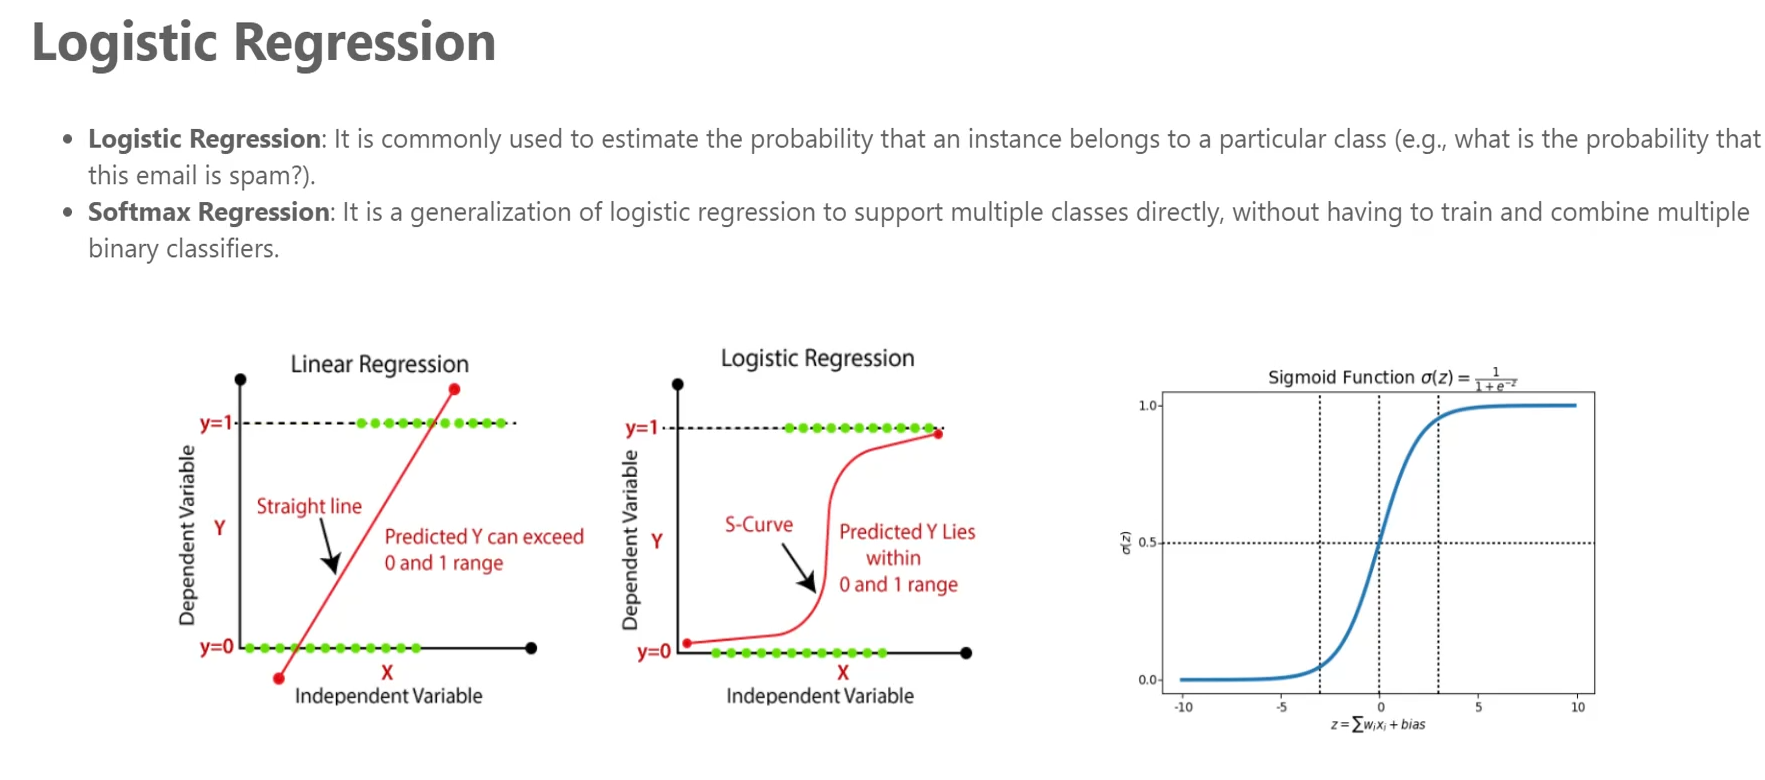

![cost logit.PNG](<attachment:cost logit.PNG>)
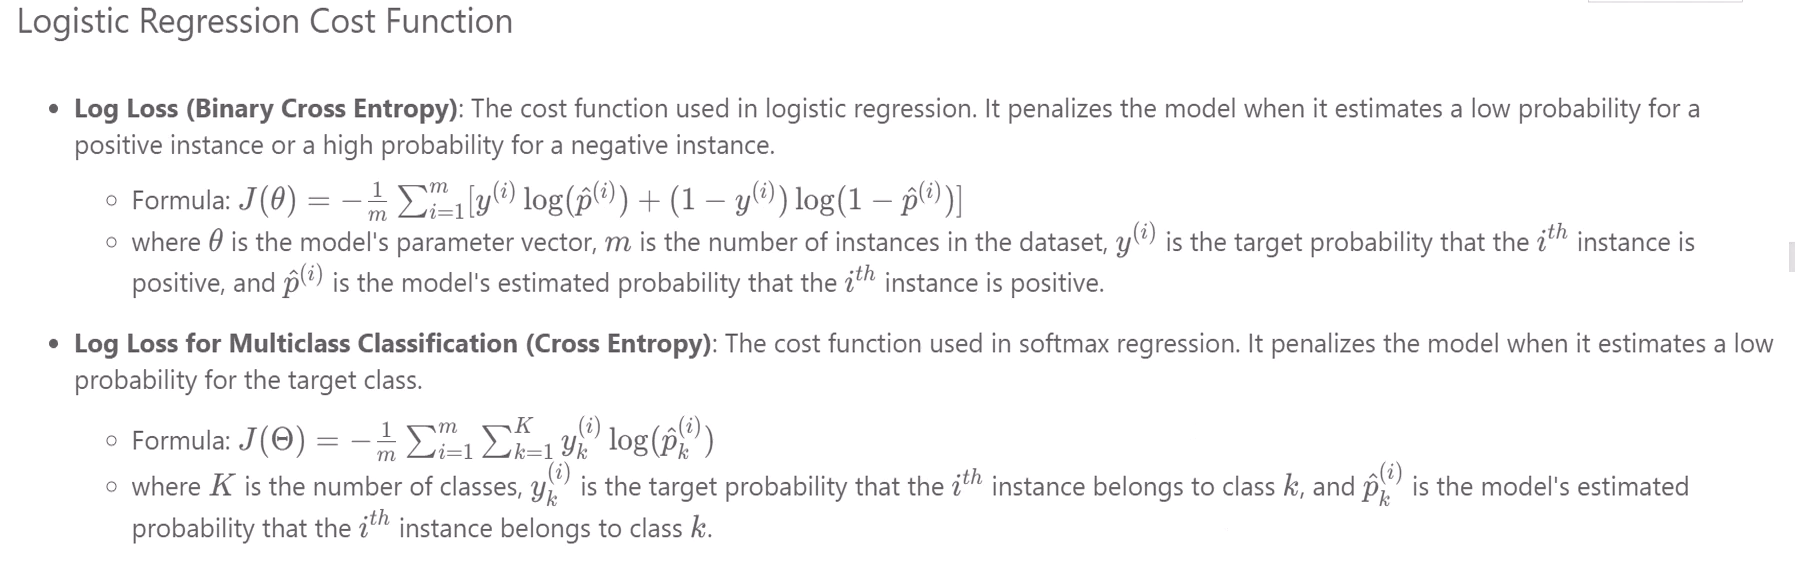

![lin vs logi.PNG](<attachment:lin vs logi.PNG>)
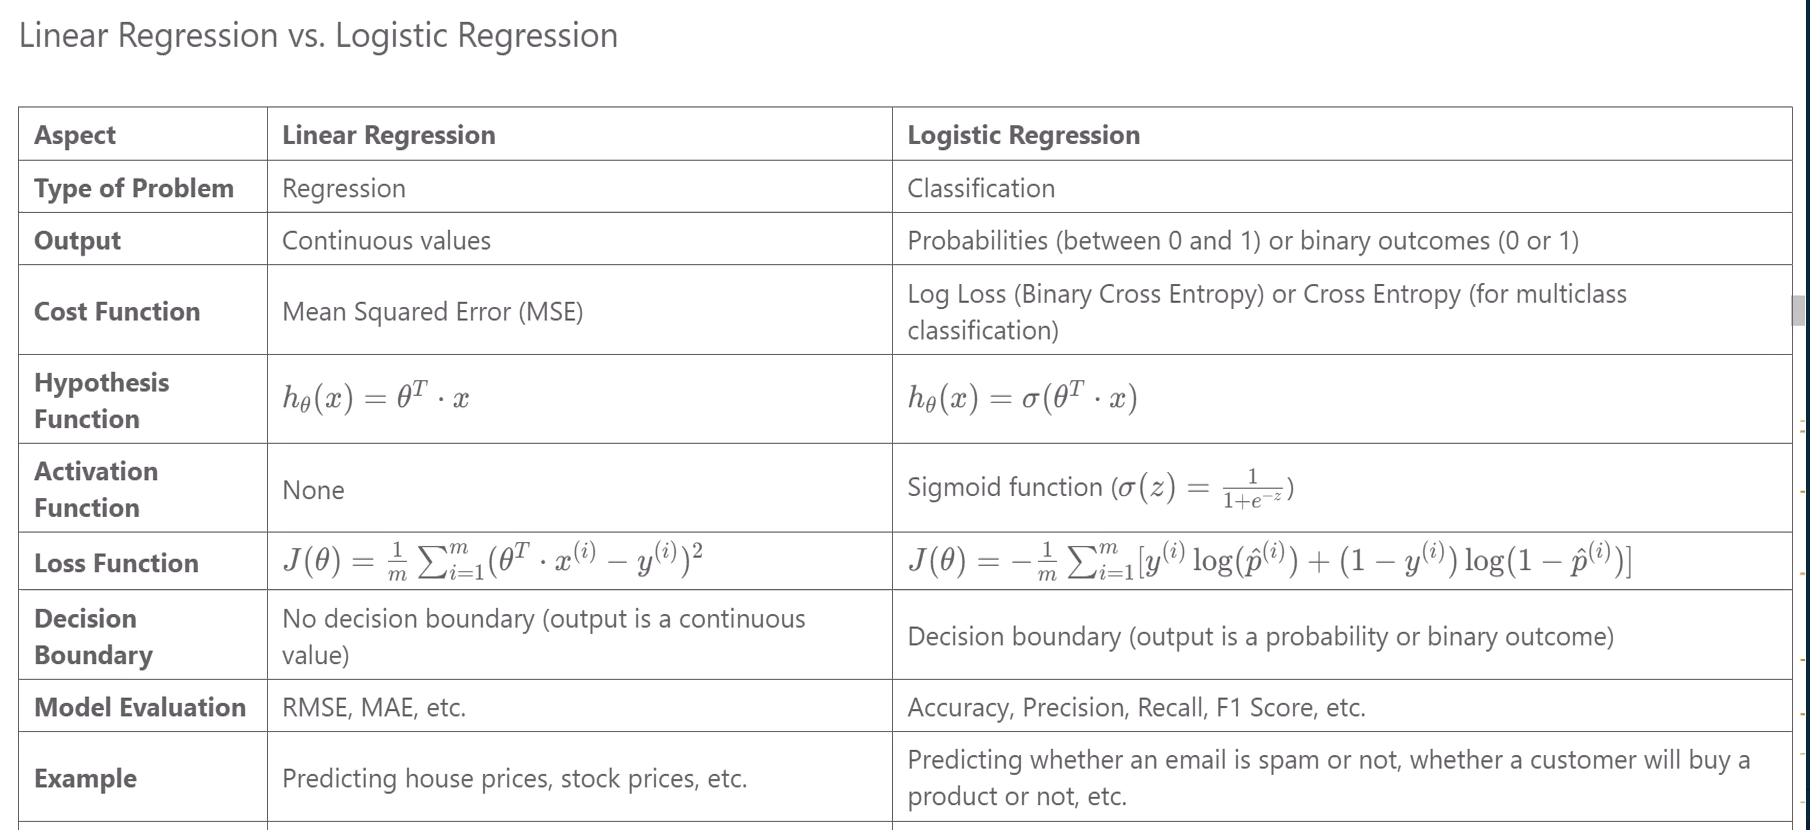